# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **religious events or traditions** (see below) for the region of **Minneapolis, Minnesota, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Minneapolis, Minnesota, United States** to Ann Arbor, USA. In that case at least one source file must be about **Minneapolis, Minnesota, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Minneapolis, Minnesota, United States** and **religious events or traditions**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **religious events or traditions**?  For this category you might consider calendar events, demographic data about religion in the region and neighboring regions, participation in religious events, or how religious events relate to political events, social movements, or historical events.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Let's import the data from Excel files
df_2007 = pd.read_excel('Muslim American Survey, 2007.XLS')
df_2011 = pd.read_excel('Muslim American Survey 2011.XLSX')

questionTranslation = [['QE1', 'Q60'], \
                       ['QE2', 'Q61'], \
                       ['QE6', 'Q63']]

fullQuestionText = ["On average, how often do you attend the\nmosque or Islamic center for Salah and Jum'ah prayer?", \
                    "Outside of prayer,\ndo you take part in other activities at the mosque?",
                    "How often do you perform daily salah or prayer?"]

firstQuestionRecoding = {1: "Almost daily",\
                        2: "Once a week",\
                        3: "Monthly",\
                        4: "Few times a year",\
                        5: "Seldom",\
                        6: "Never",\
                        -1: "Missing",\
                        9: "Missing"}

secondQuestionRecoding = {1: "Yes",\
                        2: "No",\
                        -1: "Missing",\
                        9: "Missing"}

thirdQuestionRecoding = {1: "All five daily",\
                         2: "Some of the five",\
                         3: "Occasionally",\
                         4: "Only make Eid",\
                         5: "Never pray"}

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
*** No CODEPAGE record, no encoding_override: will use 'ascii'
*** No CODEPAGE record, no encoding_override: will use 'ascii'


In [3]:
#Let's drop all the un-necessary columns and convert everything into int64
cols = np.array(df_2007.columns)
firstColsToKeep = [col[0] for col in questionTranslation]
dropList = np.setdiff1d(cols,firstColsToKeep)
df_2007.drop(labels=dropList, axis='columns', inplace=True)

cols = np.array(df_2011.columns)
firstColsToKeep = [col[1] for col in questionTranslation]
dropList = np.setdiff1d(cols,firstColsToKeep)
df_2011.drop(labels=dropList, axis='columns', inplace=True)

for colName in df_2007.columns:
    df_2007[colName] = df_2007[colName].fillna(-1).astype(int)
    
for colName in df_2011.columns:
    df_2011[colName] = df_2011[colName].fillna(-1).astype(int)

In [4]:
#Build Value Counts that we can compare between the two years.
value_count_nums = []
for questionPair in questionTranslation:
    vc1 = df_2007[questionPair[0]].value_counts()
    vc2 = df_2011[questionPair[1]].value_counts()
    value_count_nums.append([vc1, vc2])

#Convert those Value Counts to DataFrames
df_list = [pd.DataFrame({"2007": vc[0], "2011": vc[1]}) for vc in value_count_nums]

#Recode Index, Merge and Drop Missings, and convert everything to percentages
for i, questionRecodeDict in zip(range(len(df_list)), [firstQuestionRecoding, secondQuestionRecoding, thirdQuestionRecoding]):
    df_list[i] = df_list[i].groupby(df_list[i].index).agg({"2007": "sum", "2011": "sum"})
    df_list[i].drop(labels=[-1, 9], axis='rows', inplace=True)
    df_list[i].index = [questionRecodeDict[val] for val in df_list[i].index]
    
    #Convert to a percentage
    df_list[i] = (100. * df_list[i] / df_list[i].sum()).round(0)

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  app.launch_new_instance()


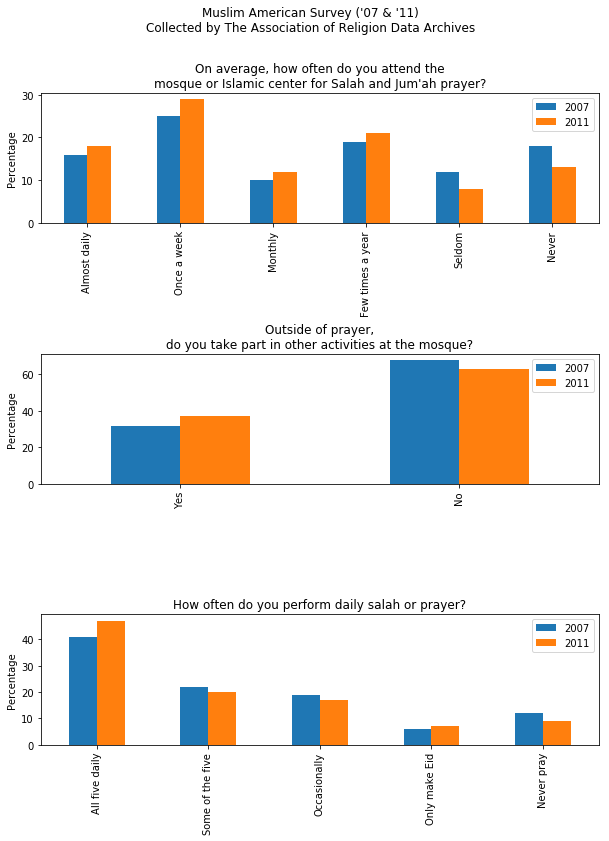

In [5]:
fig, axes = plt.subplots(nrows=3, ncols=1)
for i in range(len(df_list)):
    df_list[i].sort(axis='columns').plot(kind='bar', ax=axes[i], figsize=(10,12), title=fullQuestionText[i])
    axes[i].set_ylabel('Percentage')
    
# keep the y tick labels from getting too crowded
plt.subplots_adjust(hspace = 1.0)
fig.suptitle("Muslim American Survey ('07 & '11)\nCollected by The Association of Religion Data Archives")

plt.show()